In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
np.random.seed(42)

In [4]:
employee_ids=[f"EMP_{i:3d}" for i in range(1,31)]

In [5]:
dates=pd.date_range("2025-07-01",periods=30,freq="D")

In [8]:
data={
    "Date":np.tile(dates,len(employee_ids)),
    "Employee_ID":np.repeat(employee_ids,len(dates)),
    "Working_Hours":np.random.uniform(4,10,size=len(dates)*len(employee_ids))
}

In [9]:
df=pd.DataFrame(data)

In [10]:
df.to_csv("employee_working_hours.csv",index=False)

In [11]:
df_csv=pd.read_csv("employee_working_hours.csv")

In [12]:
print(df_csv.head())

         Date Employee_ID  Working_Hours
0  2025-07-01     EMP_  1       6.247241
1  2025-07-02     EMP_  1       9.704286
2  2025-07-03     EMP_  1       8.391964
3  2025-07-04     EMP_  1       7.591951
4  2025-07-05     EMP_  1       4.936112


In [13]:
print(df_csv.describe())

       Working_Hours
count     900.000000
mean        6.954250
std         1.762121
min         4.027792
25%         5.383714
50%         7.011134
75%         8.486632
max         9.998306


In [29]:
total_hours=df_csv.groupby("Employee_ID")["Working_Hours"].sum().sort_values(ascending=False)

In [30]:
total_hours=df_csv.groupby("Employee_ID")["Working_Hours"].sum().sort_values(ascending=False)

In [31]:
avg_daily=df_csv.groupby("Employee_ID")["Working_Hours"].mean()

In [32]:
threshold_low=5

In [33]:
threshold_high=9

In [38]:
df_csv["Low_Hour_Flag"]=df_csv["Working_Hours"] < threshold_low

In [39]:
df_csv["High_Hour_Flag"]=df_csv["Working_Hours"] > threshold_high

In [42]:
print(df_csv[df_csv["Low_Hour_Flag"] | df_csv["High_Hour_Flag"]].head())

         Date Employee_ID  Working_Hours  Low_Hour_Flag  High_Hour_Flag
1  2025-07-02     EMP_  1       9.704286          False            True
4  2025-07-05     EMP_  1       4.936112           True           False
5  2025-07-06     EMP_  1       4.935967           True           False
6  2025-07-07     EMP_  1       4.348502           True           False
7  2025-07-08     EMP_  1       9.197057          False            True


In [43]:
import matplotlib.pyplot as plt

In [44]:
import seaborn as sns

In [45]:
top10=total_hours.head(10)

In [46]:
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='Employee_ID'>

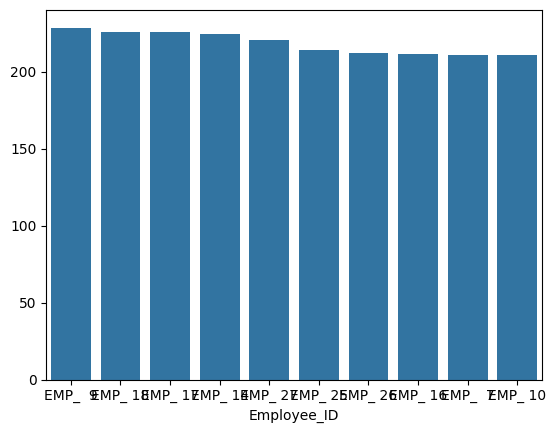

In [47]:
sns.barplot(x=top10.index,y=top10.values)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

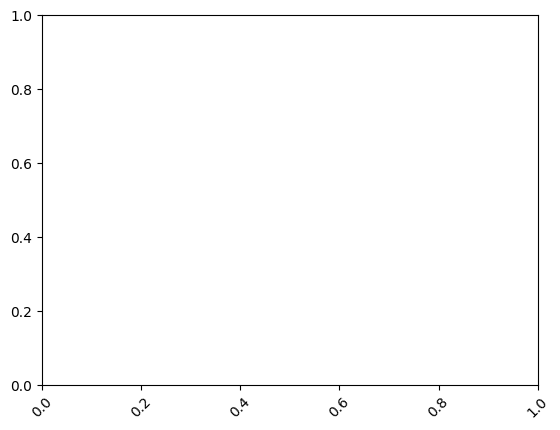

In [48]:
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Top 10 Employees by Total working Hours')

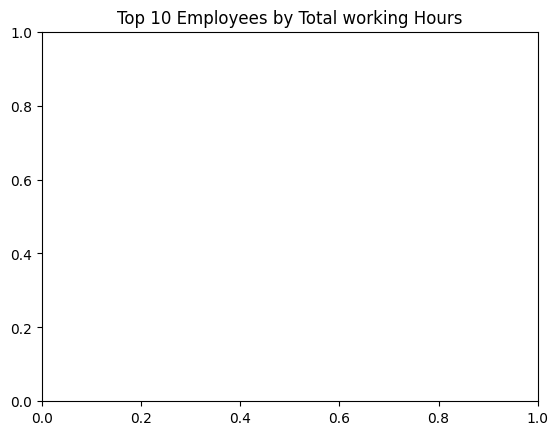

In [49]:
plt.title("Top 10 Employees by Total working Hours")

Text(0, 0.5, 'Hours')

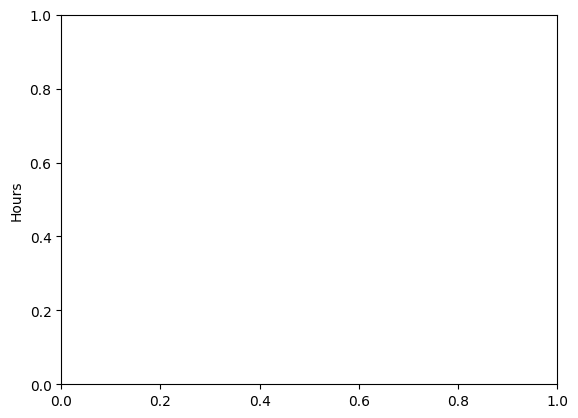

In [50]:
plt.ylabel("Hours")

In [51]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [52]:
plt.show()

In [53]:
import matplotlib.pyplot as plt

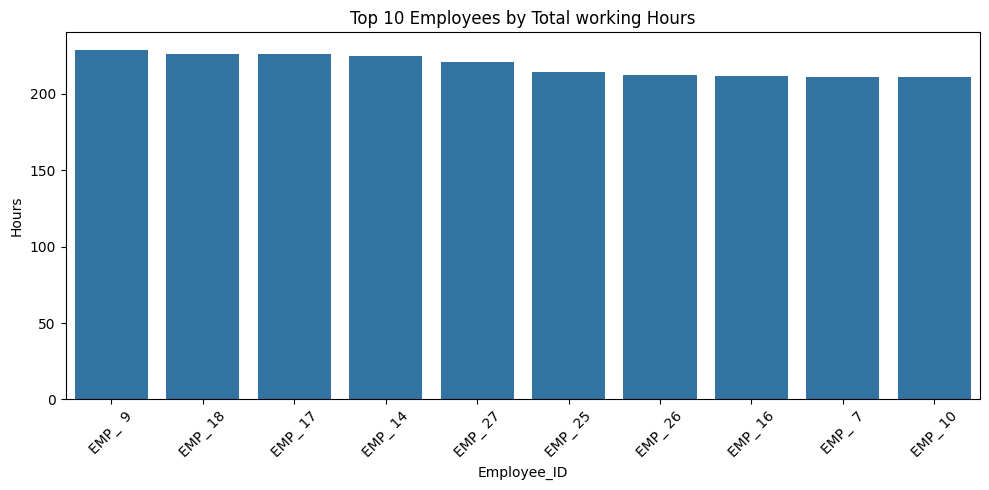

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
top10=total_hours.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index,y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 Employees by Total working Hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()

Empty DataFrame
Columns: []
Index: []


KeyError: 'High Temp (°C)'